In [1]:
import numpy as np
import pandas as pd
import data_processing as dp
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet(f'/media/ELAsTICC/Fink/first_year/ftransfer_elasticc_2023-02-15_946675/aggregated/classId=111.parquet')

In [4]:
%%time
data_plas = dp.elasticc_agg_to_plasticc(data)
formatted = dp.format_plasticc(data_plas, 100)
preprocessed = dp.preprocess(formatted)
features = dp.extract_rainbow(preprocessed)

CPU times: user 9.6 s, sys: 1.17 s, total: 10.8 s
Wall time: 10.6 s


a            0.703819
t0          16.649517
trise       -2.755210
Tmin      1794.891120
dT       10109.546436
ksig       132.743698
Name: 5, dtype: float64


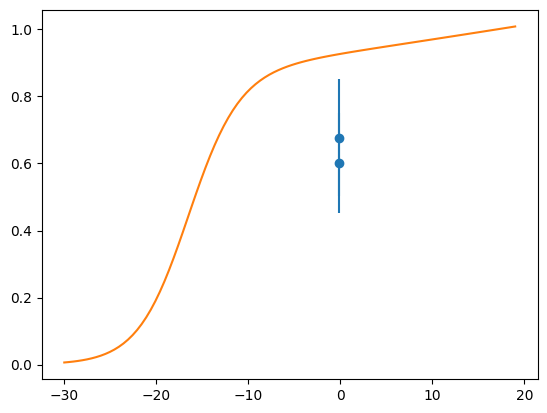

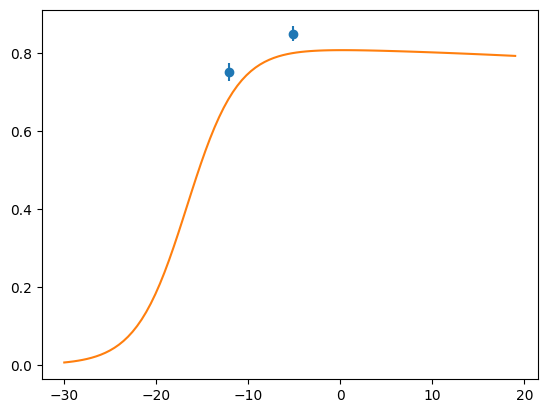

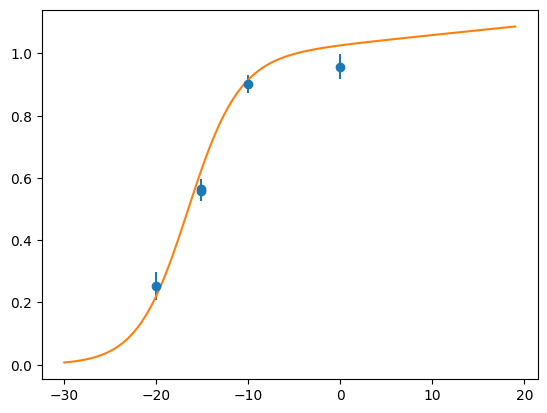

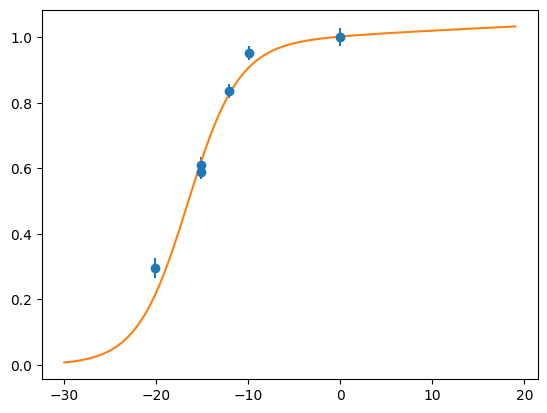

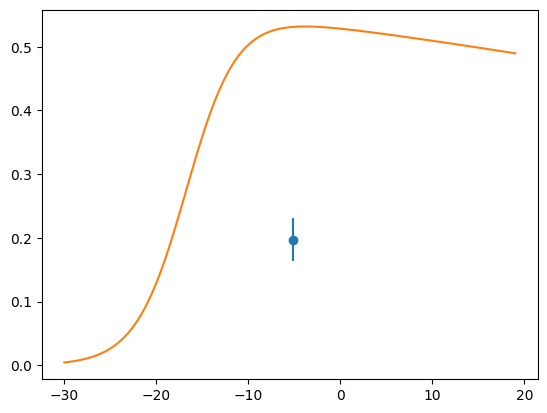

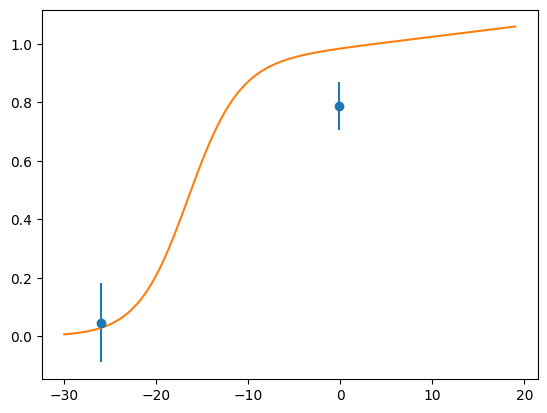

In [16]:
idx = 5
obj = preprocessed[idx]
params = features.iloc[idx][:6]
print(params)

for band in np.unique(obj['BAND']):
    sub = obj[obj['BAND']==band]
    f, ferr, t = sub['FLUXCAL'], sub['FLUXCALERR'], sub['MJD']
    nu = dp.freq_dic.get(band)
    
    X1 = np.array([np.linspace(-30, 19, 100)])
    X2 = np.array([[nu]*len(X1[0])])
    X = np.concatenate((X1, X2), axis = 0)


    plt.figure()
    plt.errorbar(t, f, yerr=ferr, fmt='o')
    plt.plot(X[0], dp.Fnu(X, *params))